In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## 1. Первичный анализ датасета livejournal.csv


In [20]:
df_live = pd.read_csv('../../data/livejournal.csv')

In [21]:
df_live

,_id,url,title,last_taken_ts,last_published_ts,last_updated_ts,extra.username,extra.description,type_id
0,680b5ea843627ed63472cdc9,https://vitas1917.livejournal.com,NaN,1747323601,1741202040,0,vitas1917,Записки рушанина,680b7390fee018c5a3ed7901
1,680b5ea843627ed63472cdca,https://masterok.livejournal.com,NaN,1747323601,1744788016,0,masterok,Хочу все знать,680b7390fee018c5a3ed7901
2,680b5ea843627ed63472cdcb,https://alexandr-rogers.livejournal.com,NaN,1747323601,1744723080,0,alexandr_rogers,NaN,680b7390fee018c5a3ed7901
3,680b5ea843627ed63472cdcc,https://daniel-grishin.livejournal.com,NaN,1747323601,1744737228,0,daniel_grishin,Русский в Германии,680b7390fee018c5a3ed7901
4,680b5ea843627ed63472cdcd,https://amarok-man.livejournal.com,NaN,1747323601,1744737224,0,amarok_man,""" На каждый хорей найдётся свой тынзян ""-из пу...",680b7390fee018c5a3ed7901
...,...,...,...,...,...,...,...,...,...
124145,680b5fd643627ed63474b2ba,https://asuradeva.livejournal.com,asuradeva's Journal,1747323589,1635329100,0,asuradeva,NaN,680b7390fee018c5a3ed7901
124146,680b5fd643627ed63474b2bb,https://samojloff.livejournal.com,Толстые люди в просторных футболках,1747323589,1504850760,0,samojloff,Толстые люди в просторных футболках,680b7390fee018c5a3ed7901
124147,680b5fd643627ed63474b2bc,https://icona-mat.livejournal.com,Ничего святого...,1747323589,1452608520,0,icona_mat,Ничего святого...,680b7390fee018c5a3ed7901
124148,680b5fd643627ed63474b2bd,https://baydonaut.livejournal.com,Байдологика,1747323589,1740651360,0,baydonaut,Байдологика,680b7390fee018c5a3ed7901


In [22]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124150 entries, 0 to 124149
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   _id                124150 non-null  object
 1   url                124150 non-null  object
 2   title              119205 non-null  object
 3   last_taken_ts      124150 non-null  int64 
 4   last_published_ts  124150 non-null  int64 
 5   last_updated_ts    124150 non-null  int64 
 6   extra.username     124150 non-null  object
 7   extra.description  81108 non-null   object
 8   type_id            124150 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.5+ MB


In [23]:
df_live.isnull().sum()

_id                      0
url                      0
title                 4945
last_taken_ts            0
last_published_ts        0
last_updated_ts          0
extra.username           0
extra.description    43042
type_id                  0
dtype: int64

In [24]:
df_live.nunique()

_id                  124150
url                  124150
title                116743
last_taken_ts          2483
last_published_ts     99556
last_updated_ts           1
extra.username       124150
extra.description     77031
type_id                   1
dtype: int64

### Преобразование данных

- Преобразуем дату в понятный человеку формат
- Уберём все *Не информативные записи*, а именно:
    - Удалим записи, где нет поля `title`
    - Удалим столбец `last_updated_ts`, все значения 0
    - Удалим поля где `last_published_ts` равны 0, так как не понятно, что это эти данные значат, какие-то это профили пользователей, а какие-то это статьи без содержания
    - Удалим строки, где дата публикации < 15.04.1999, так как в это время сайт начал свою работу


In [73]:
df_live_cleaned = df_live.copy()

df_live_cleaned = df_live_cleaned[df_live_cleaned['last_published_ts'] != 0]

df_live_cleaned['last_published_ts'] = pd.to_datetime(df_live_cleaned['last_published_ts'], unit='s')
df_live_cleaned['last_taken_ts'] = pd.to_datetime(df_live_cleaned['last_taken_ts'], unit='s')

df_live_cleaned = df_live_cleaned[df_live_cleaned['last_published_ts'] >= pd.Timestamp("1999-04-15")]

df_live_cleaned = df_live_cleaned.replace('NaN', pd.NA)
df_live_cleaned = df_live_cleaned.dropna(subset=['title'])


df_live_cleaned = df_live_cleaned.drop(columns=['last_updated_ts'])

In [74]:
df_live_cleaned

,_id,url,title,last_taken_ts,last_published_ts,extra.username,extra.description,type_id
4879,680b5eb543627ed63472e0d8,https://elhombresombro.livejournal.com,Правила хорошего Антона,2025-05-15 15:55:18,2025-04-16 07:54:26,elhombresombro,Блогер номер один в Ростове-на-Дону,680b7390fee018c5a3ed7901
4880,680b5eb543627ed63472e0d9,https://mangiana-irina.livejournal.com,Блог невольной затворницы,2025-05-15 15:55:18,2025-04-16 07:54:22,mangiana_irina,"""Никто не живёт бесплодно, ничто не пропадает ...",680b7390fee018c5a3ed7901
4881,680b5eb543627ed63472e0da,https://olegmakarenko.ru,Место для дискуссий,2025-05-15 15:55:18,2025-04-15 17:00:00,olegmakarenko.ru,"Блогер, предприниматель, общественный деятель....",680b7390fee018c5a3ed7901
4882,680b5eb543627ed63472e0db,https://shakko.ru,Шакко: об искусстве,2025-05-15 15:55:18,2025-05-15 15:55:21,shakko.ru,Необычный блог про историю искусства,680b7390fee018c5a3ed7901
4883,680b5eb543627ed63472e0dc,https://salmaksoff.livejournal.com,Победа над уЖЖасами неизбеЖЖна!,2025-05-15 15:55:18,2025-05-15 15:55:21,salmaksoff,Только Победа!,680b7390fee018c5a3ed7901
...,...,...,...,...,...,...,...,...
124145,680b5fd643627ed63474b2ba,https://asuradeva.livejournal.com,asuradeva's Journal,2025-05-15 15:39:49,2021-10-27 10:05:00,asuradeva,NaN,680b7390fee018c5a3ed7901
124146,680b5fd643627ed63474b2bb,https://samojloff.livejournal.com,Толстые люди в просторных футболках,2025-05-15 15:39:49,2017-09-08 06:06:00,samojloff,Толстые люди в просторных футболках,680b7390fee018c5a3ed7901
124147,680b5fd643627ed63474b2bc,https://icona-mat.livejournal.com,Ничего святого...,2025-05-15 15:39:49,2016-01-12 14:22:00,icona_mat,Ничего святого...,680b7390fee018c5a3ed7901
124148,680b5fd643627ed63474b2bd,https://baydonaut.livejournal.com,Байдологика,2025-05-15 15:39:49,2025-02-27 10:16:00,baydonaut,Байдологика,680b7390fee018c5a3ed7901


### Анализ данных
Так как, в нашем распоряжении не так много информативной информации, мы можем смотреть только на временное распределение, основываясь на этом можно будет получить инсайды, по которым мы можем получить понимание, в какие моменты времени пользователи сайта [livejournal.com](https://www.livejournal.com/) выкладывали статьи. 

Далее можно посмотреть на события произошедшее в это время и получить полную картину, что сподвигла людей пользоваться данным веб-ресурсом 
 
- В данной секции разберём наши данные по распределению публикаций по времени
- Количество публикаций по годам
- Количество публикаций по месяцам, найдём самый активный месяц, за всё время


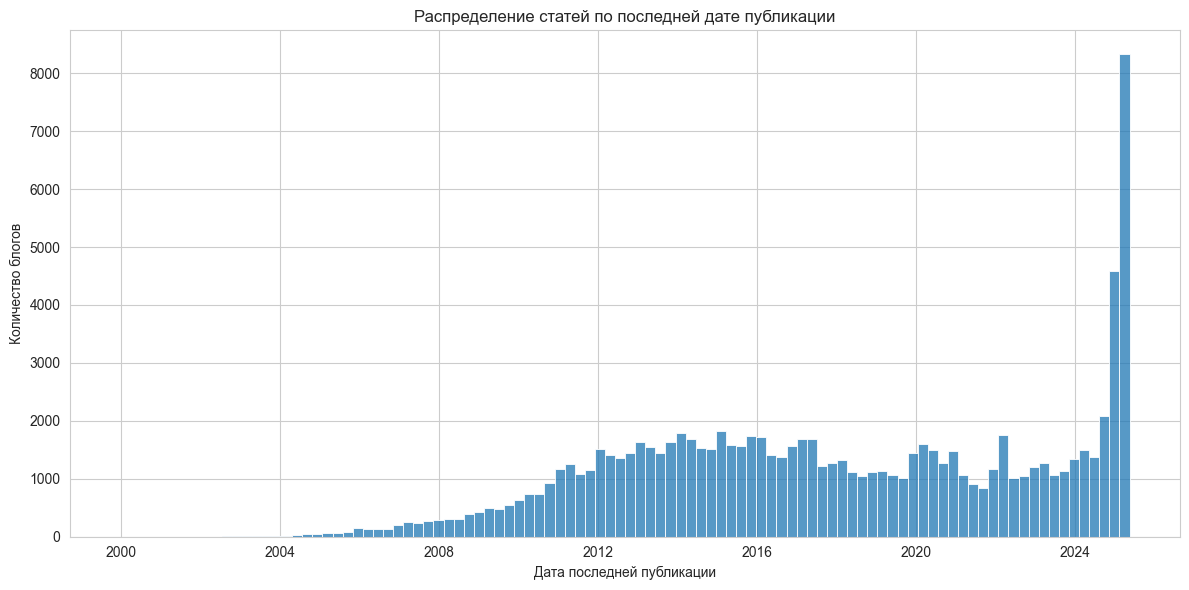

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(df_live_cleaned['last_published_ts'], bins=100)
plt.title('Распределение статей по последней дате публикации')
plt.xlabel('Дата последней публикации')
plt.ylabel('Количество блогов')
plt.tight_layout()
plt.show()

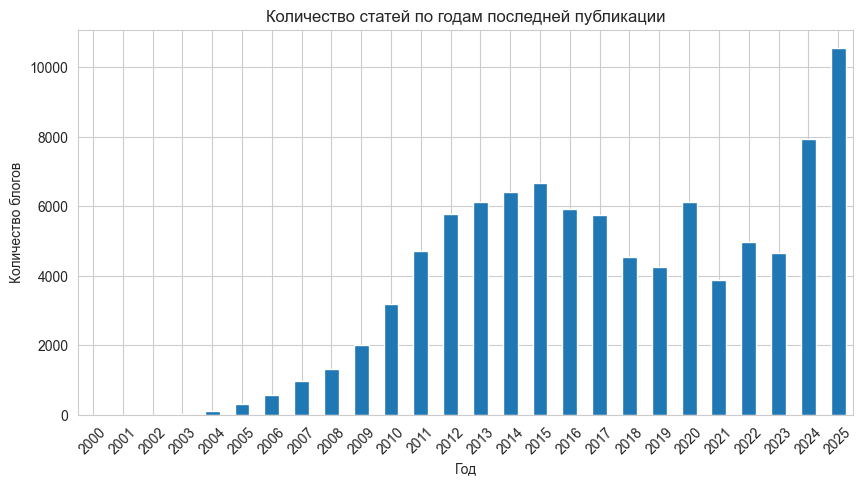

In [95]:
df_live_cleaned['published_year'] = df_live_cleaned['last_published_ts'].dt.year

plt.figure(figsize=(10, 5))
df_live_cleaned['published_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Количество статей по годам последней публикации')
plt.xlabel('Год')
plt.ylabel('Количество блогов')
plt.xticks(rotation=45)
plt.show()

In [91]:
df_live_cleaned['published_month'] = df_live_cleaned['last_published_ts'].dt.month

month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_live_cleaned['published_month_name'] = df_live_cleaned['published_month'].map(month_map)

month_counts = df_live_cleaned['published_month'].value_counts().sort_index()
month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']


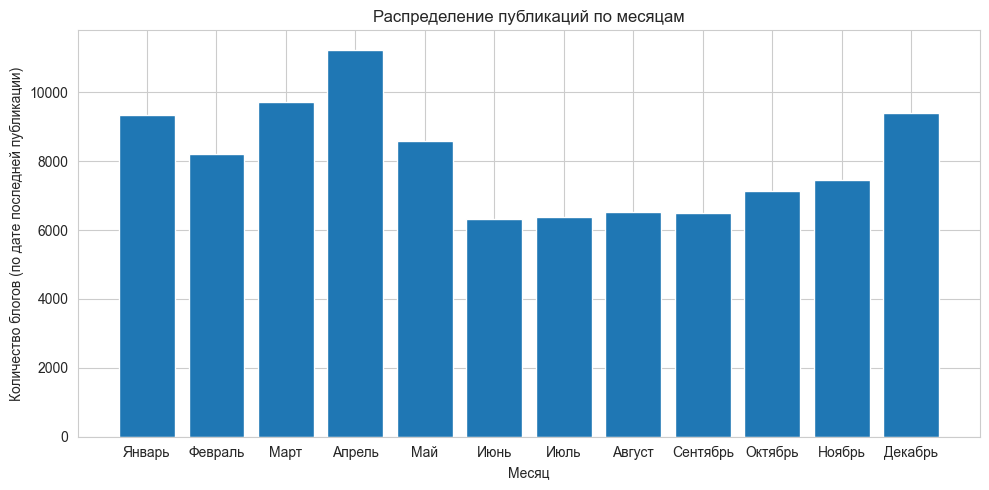

In [93]:
plt.figure(figsize=(10, 5))
plt.bar(month_names, month_counts.values)
plt.title('Распределение публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество блогов (по дате последней публикации)')
plt.tight_layout()
plt.show()

### Вывод:

Данная EDA, показывает, что у людей в последнее время выросла тенденция вести блоги, создавать обсуждения и выражать свои мысли о разных вещах. 

К сожалению из-за недостатков данных, мы не можем определить, что в большей степени интересно людям, однако спрос на блоги есть

Так же хочется отметить, что в зимние месяцы и весенние, публикуется больше всего блогов, это может быть связано с праздниками и выходными днями у большей части целевой аудитории, данных сайтов.

## 2. Первичный анализ maps.csv